In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("train.csv").drop("Id", axis="columns")
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
contin_cols = train.drop("SalePrice", axis="columns").describe().columns.tolist()
contin_df = train[contin_cols].fillna(0)

In [5]:
cat_df = train.drop(contin_cols+["SalePrice"], axis="columns")
cat_cols = cat_df.columns.tolist()

In [6]:
class CustomLabelEncoder:
    def fit(self, values):
        self.labels = set([v for v in values if not(isinstance(v, float) and np.isnan(v))])
        self.mapper = {l:i for i, l in enumerate(self.labels, start=1)}
        self.mapper[np.nan] = 0
        return self
        
    def transform(self, values):
        return values.map(self.mapper)
    
    def __repr__(self):
        return str(self.mapper)

In [7]:
encoders_dict = {}
for c in cat_cols:
    enc = CustomLabelEncoder().fit(cat_df[c])
    encoders_dict[c] = enc
    
    cat_df[c] = enc.transform(cat_df[c])

In [8]:
X_train = pd.concat([contin_df, cat_df], axis="columns")
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,3,3,2,2,1,0,0,0,5,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,3,2,2,1,0,0,0,5,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,3,3,2,2,1,0,0,0,5,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,1,2,2,1,0,0,0,5,5
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,3,2,2,1,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,3,3,2,2,1,0,0,0,5,1
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,3,1,2,2,1,0,1,0,5,1
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,3,3,2,2,1,0,4,4,5,1
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,3,1,2,2,1,0,0,0,5,1


In [9]:
y_train = train.SalePrice

In [10]:
test = pd.read_csv("test.csv")
contin_test = test[contin_df.columns].fillna(0)
cat_test = test[cat_df.columns]

for c in cat_cols:
    enc = encoders_dict[c]
    cat_test[c] = enc.transform(cat_test[c])

X_test = pd.concat([contin_test, cat_test], axis="columns")

<ipython-input-10-98354b8d58ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test[c] = enc.transform(cat_test[c])


In [11]:
feature_names = X_train.columns.tolist()
categorical_feature_names = cat_cols

In [12]:
!pip install lightgbm
import lightgbm as lgb 


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [13]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 12,
    'learning_rate': 0.0005,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.75,
    'bagging_freq': 5,
    'seed': 1,
    'verbose': 1,
    'force_row_wise': True
}

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [16]:
lgb_train = lgb.Dataset(
        X_train_train[feature_names], y_train_train, categorical_feature=None)
lgb_val = lgb.Dataset(
        X_val[feature_names], y_val, categorical_feature=None)

In [17]:
evals_result = {}
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=40000,
    feature_name=feature_names,
    valid_sets=(lgb_train, lgb_val),
    categorical_feature=categorical_feature_names,
    verbose_eval=100,
    evals_result=evals_result,
    early_stopping_rounds=1000)

[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 76
[LightGBM] [Info] Start training from score 180806.579909
Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 76765.3	valid_1's rmse: 74141.8
[200]	training's rmse: 73993.6	valid_1's rmse: 71390.2


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[300]	training's rmse: 71353.5	valid_1's rmse: 68785.9
[400]	training's rmse: 68875.1	valid_1's rmse: 66394.5
[500]	training's rmse: 66490.8	valid_1's rmse: 64072.5
[600]	training's rmse: 64237.1	valid_1's rmse: 61880.6
[700]	training's rmse: 62076.7	valid_1's rmse: 59783.8
[800]	training's rmse: 60030.6	valid_1's rmse: 57806.7
[900]	training's rmse: 58086.2	valid_1's rmse: 55940.4
[1000]	training's rmse: 56243.7	valid_1's rmse: 54198.3
[1100]	training's rmse: 54489.6	valid_1's rmse: 52555.7
[1200]	training's rmse: 52821.6	valid_1's rmse: 50997.7
[1300]	training's rmse: 51230.9	valid_1's rmse: 49485.5
[1400]	training's rmse: 49720.8	valid_1's rmse: 48100.7
[1500]	training's rmse: 48277.3	valid_1's rmse: 46810.6
[1600]	training's rmse: 46897.9	valid_1's rmse: 45577.3
[1700]	training's rmse: 45609.8	valid_1's rmse: 44443.2
[1800]	training's rmse: 44369.6	valid_1's rmse: 43370.4
[1900]	training's rmse: 43212.7	valid_1's rmse: 42409.5
[2000]	training's rmse: 42096	valid_1's rmse: 41466.5
[

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

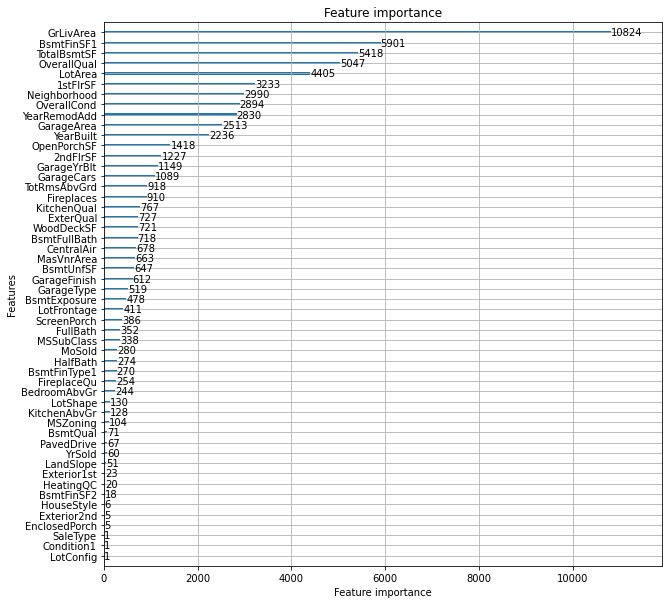

In [27]:
lgb.plot_importance(gbm, figsize=(10, 10))
#drop features with feature importance < 10 (or something like 10)
#Use feature engineering

In [20]:
gbm.feature_importance()

array([  338,   411,  4405,  5047,  2894,  2236,  2830,   663,  5901,
          18,   647,  5418,  3233,  1227,     0, 10824,   718,     0,
         352,   274,   244,   128,   918,   910,  1149,  1089,  2513,
         721,  1418,     5,     0,   386,     0,     0,   280,    60,
         104,     0,     0,   130,     0,     0,     1,    51,  2990,
           1,     0,     0,     6,     0,     0,    23,     5,     0,
         727,     0,     0,    71,     0,   478,   270,     0,     0,
          20,   678,     0,   767,     0,   254,   519,   612,     0,
           0,    67,     0,     0,     0,     1,     0], dtype=int32)

In [19]:
test["SalePrice"] = gbm.predict(X_test)
test[["Id", "SalePrice"]].to_csv("lightgbm_submission.csv", index=None)